As usual, we import pandas and read the necessary dataset.

In [1]:
import pandas as pd

In [2]:
zips = pd.read_csv('data/social_capital_zip.csv')

In [3]:
zips

,zip,county,num_below_p50,pop2018,ec_zip,ec_se_zip,nbhd_ec_zip,ec_grp_mem_zip,ec_high_zip,ec_high_se_zip,...,exposure_grp_mem_high_zip,nbhd_exposure_zip,bias_grp_mem_zip,bias_grp_mem_high_zip,nbhd_bias_zip,nbhd_bias_high_zip,clustering_zip,support_ratio_zip,volunteering_rate_zip,civic_organizations_zip
0,1001,25013.0,995.787468,17621,0.88157,0.02422,1.51095,1.10210,1.47136,0.01599,...,1.45669,1.50590,0.02434,-0.10001,-0.00336,-0.21186,0.105720,0.945260,0.05650,0.010800
1,1002,25015.0,1312.117077,30066,1.18348,0.02227,0.97760,1.23333,1.62290,0.01500,...,1.53277,1.20282,0.09856,-0.06421,0.18724,-0.24353,0.103400,0.901630,0.14951,0.036880
2,1003,25015.0,NaN,11238,1.37536,0.05046,NaN,1.44359,1.65159,0.02898,...,1.57757,NaN,0.02482,-0.05143,NaN,NaN,0.136500,0.769240,0.10501,0.080500
3,1005,25027.0,381.519745,4991,1.15543,0.03050,1.46491,1.30756,1.47733,0.01664,...,1.43769,1.46397,0.00850,-0.07246,-0.00064,-0.11397,0.105540,0.958370,0.15862,0.021630
4,1007,25015.0,915.396667,14967,1.19240,0.02046,1.17985,1.32294,1.56812,0.01364,...,1.43019,1.23109,-0.01188,-0.11464,0.04162,-0.21283,0.103910,0.948730,0.13053,0.016900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23023,99901,2130.0,1192.299809,13818,0.99517,0.01776,0.88014,0.95456,1.29659,0.01806,...,1.09039,0.94762,0.05710,-0.14293,0.07122,-0.21950,0.134730,0.997200,0.11883,0.029990
23024,99921,2198.0,365.768661,1986,0.87977,0.03071,0.74555,0.82996,1.18270,0.03593,...,1.04318,0.81680,0.06010,-0.08759,0.08723,-0.14339,0.155610,0.997520,0.08404,0.032150
23025,99925,2198.0,154.513840,927,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.146579,0.992298,0.12396,0.027728
23026,99926,2198.0,311.014252,1635,0.87888,0.03618,0.81081,0.83409,1.07167,0.04187,...,0.92952,0.80694,0.00877,-0.07257,-0.00480,-0.09655,0.252740,1.000000,0.14291,0.011250


In [4]:
def fixStateCode(x):
    if(len(x) == 1):
        return '0'+x
    else:
        return x

In [5]:
def fixCountyCode(x):
    return ((3-len(x))*'0')+x


In [6]:
def createCountyCode():
    return df[['state']] + df[["county"]]

In [7]:
zips = zips[['zip','county','ec_zip']]

In [8]:
zips

,zip,county,ec_zip
0,1001,25013.0,0.88157
1,1002,25015.0,1.18348
2,1003,25015.0,1.37536
3,1005,25027.0,1.15543
4,1007,25015.0,1.19240
...,...,...,...
23023,99901,2130.0,0.99517
23024,99921,2198.0,0.87977
23025,99925,2198.0,NaN
23026,99926,2198.0,0.87888


After a lot of research online (truly a lot), we find the dataset that has all the zip demographics that we need.

So, we read the dataset.

In [9]:
zip_covariates = pd.io.stata.read_stata('data\social_capital_replication\Other public covariate data\zip_covariates.dta')

In [11]:
zip_covariates

,zip,num_below_p50,kfr_pooled_pooled_p25,kfr_26_pooled_pooled_p25,kid_black_pooled_blw_p50_n,kfr_black_pooled_p25,kid_white_pooled_blw_p50_n,kfr_white_pooled_p25,pop_2000_n,jobs_total_5mi_2015,...,pop2018,med_inc_2018,share_white_2018,share_black_2018,share_natam_2018,share_asian_2018,share_hawaii_2018,share_hispanic_2018,cz,czname
0,36006,210.877877,0.375984,0.460341,81.351499,0.348443,120.394809,0.412860,1207.138634,309.533479,...,913,47148.0,0.838992,0.110624,0.002191,0.000000,0.000000,0.010953,11101.0,Montgomery
1,36067,3396.898229,0.351230,0.413896,1187.164279,0.295008,2022.323759,0.402333,23045.006217,6666.228625,...,28727,53578.0,0.713614,0.214885,0.004142,0.004978,0.000174,0.042155,11101.0,Montgomery
2,36749,193.980705,0.356113,0.418601,114.752491,0.332565,73.111485,0.409344,1069.127396,1177.834674,...,779,37054.0,0.707317,0.292683,0.000000,0.000000,0.000000,0.000000,11101.0,Montgomery
3,36066,1261.963181,0.404268,0.445521,250.701201,0.327684,933.891151,0.438869,13441.530151,11873.922321,...,19097,62089.0,0.766194,0.161858,0.003142,0.029376,0.000000,0.019165,11101.0,Montgomery
4,36051,278.664883,0.360447,0.423355,61.973826,0.331816,199.838793,0.388097,1866.933563,592.243591,...,2106,69423.0,0.807217,0.177113,0.000000,0.000000,0.000000,0.015670,11101.0,Montgomery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32812,82442,84.668144,0.492363,0.504219,NaN,NaN,64.030983,0.520918,673.726135,NaN,...,710,55733.0,0.969014,0.000000,0.000000,0.000000,0.000000,0.004225,34302.0,Worland
32813,82401,827.899271,0.460857,0.500579,NaN,NaN,597.772352,0.484634,7679.737826,NaN,...,7585,52988.0,0.810020,0.000132,0.003823,0.000000,0.000000,0.151615,34302.0,Worland
32814,82730,127.302503,0.499194,0.511907,NaN,NaN,118.333812,0.507033,1406.432987,NaN,...,1531,41667.0,0.852384,0.022208,0.000000,0.019595,0.000000,0.035924,34601.0,Gillette
32815,82701,492.476140,0.482879,0.526536,NaN,NaN,443.024637,0.490022,5065.365210,515.000000,...,5486,55192.0,0.921619,0.000365,0.006744,0.051039,0.000000,0.013489,34601.0,Gillette


We only keep the necessary columns.

In [12]:
zip_cov = zip_covariates[['zip','kfr_pooled_pooled_p25','med_inc_2018','county']]

In [13]:
zip_cov

,zip,kfr_pooled_pooled_p25,med_inc_2018,county
0,36006,0.375984,47148.0,1001
1,36067,0.351230,53578.0,1001
2,36749,0.356113,37054.0,1001
3,36066,0.404268,62089.0,1001
4,36051,0.360447,69423.0,1001
...,...,...,...,...
32812,82442,0.492363,55733.0,56043
32813,82401,0.460857,52988.0,56043
32814,82730,0.499194,41667.0,56045
32815,82701,0.482879,55192.0,56045


In [14]:
# zip_cov['county'] = zip_cov['county'].astype('string')

In [15]:
# zip_cov['county'] = zip_cov['county'].apply(fixCountyCode)

In [16]:
# def addZeroInFront(x):
#     if len(x) == 4:
#         return '0'+x

In [17]:
# zip_cov['county'] = zip_cov['county'].apply(addZeroInFront)

Now, we need to merge the two dataframes in order to combine the median household income and the kfr_pooled_pooled_p25.

In [18]:
zip_merged = pd.merge(zips, zip_cov, on='zip', how='outer')

The new dataframe looks like this:

In [19]:
zip_merged

,zip,county_x,ec_zip,kfr_pooled_pooled_p25,med_inc_2018,county_y
0,1001,25013.0,0.88157,0.468741,62144.0,25013.0
1,1002,25015.0,1.18348,0.475851,55858.0,25015.0
2,1003,25015.0,1.37536,NaN,2499.0,25015.0
3,1005,25027.0,1.15543,0.407809,68278.0,25027.0
4,1007,25015.0,1.19240,0.476621,93300.0,25015.0
...,...,...,...,...,...,...
32821,82933,NaN,NaN,0.583217,83844.0,56041.0
32822,82939,NaN,NaN,0.583217,57667.0,56041.0
32823,82936,NaN,NaN,0.583217,NaN,56041.0
32824,82442,NaN,NaN,0.492363,55733.0,56043.0


We only keep the necessary columns.

In [20]:
zip_merged = zip_merged[['zip','ec_zip','med_inc_2018','kfr_pooled_pooled_p25']]

In [21]:
zip_merged

,zip,ec_zip,med_inc_2018,kfr_pooled_pooled_p25
0,1001,0.88157,62144.0,0.468741
1,1002,1.18348,55858.0,0.475851
2,1003,1.37536,2499.0,NaN
3,1005,1.15543,68278.0,0.407809
4,1007,1.19240,93300.0,0.476621
...,...,...,...,...
32821,82933,NaN,83844.0,0.583217
32822,82939,NaN,57667.0,0.583217
32823,82936,NaN,NaN,0.583217
32824,82442,NaN,55733.0,0.492363


We need to get rid of all the NaN values. 

So we use dropna on all the columns of the dataset.

In [22]:
zip_merged = zip_merged.dropna()

Now, let's create the bins.

We will use the qcut method provided by pandas.

We want 5 equal buckets and we define the order as follows of the bin labels as follows:

In [23]:
order = ['< 38','38 - 41','41 - 44','44 - 48','> 48']

In [24]:
bins = pd.qcut(zip_merged['kfr_pooled_pooled_p25'],q=5,precision=2,labels = order)

In [25]:
bins

0        44 - 48
1        44 - 48
3        38 - 41
4        44 - 48
6           > 48
          ...   
23022       > 48
23023    38 - 41
23024       < 38
23026       < 38
23027    38 - 41
Name: kfr_pooled_pooled_p25, Length: 18913, dtype: category
Categories (5, object): ['< 38' < '38 - 41' < '41 - 44' < '44 - 48' < '> 48']

We insert the bins into a new column in the dataframe.

In [26]:
zip_merged['bins'] = bins


C:\Users\mernick\AppData\Local\Temp\ipykernel_18532\3083061922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zip_merged['bins'] = bins


Now, the dataframe looks like this:

In [27]:
zip_merged

,zip,ec_zip,med_inc_2018,kfr_pooled_pooled_p25,bins
0,1001,0.88157,62144.0,0.468741,44 - 48
1,1002,1.18348,55858.0,0.475851,44 - 48
3,1005,1.15543,68278.0,0.407809,38 - 41
4,1007,1.19240,93300.0,0.476621,44 - 48
6,1010,0.73856,84471.0,0.492584,> 48
...,...,...,...,...,...
23022,99840,1.11489,72237.0,0.485863,> 48
23023,99901,0.99517,70356.0,0.404646,38 - 41
23024,99921,0.87977,58571.0,0.294530,< 38
23026,99926,0.87888,53409.0,0.277356,< 38


We see in the given scatterplot that the income is between 30.000 USD and 100.000 USD.

So, we take only these rows that satisfy this prerequisite .

In [28]:
dt = zip_merged.loc[zip_merged['med_inc_2018'].between(30000,100000,inclusive='both')]

This is the final dataframe that we'll use to create the scatterplot.


In [29]:
dt

,zip,ec_zip,med_inc_2018,kfr_pooled_pooled_p25,bins
0,1001,0.88157,62144.0,0.468741,44 - 48
1,1002,1.18348,55858.0,0.475851,44 - 48
3,1005,1.15543,68278.0,0.407809,38 - 41
4,1007,1.19240,93300.0,0.476621,44 - 48
6,1010,0.73856,84471.0,0.492584,> 48
...,...,...,...,...,...
23022,99840,1.11489,72237.0,0.485863,> 48
23023,99901,0.99517,70356.0,0.404646,38 - 41
23024,99921,0.87977,58571.0,0.294530,< 38
23026,99926,0.87888,53409.0,0.277356,< 38


We will use relplot from seaborn.

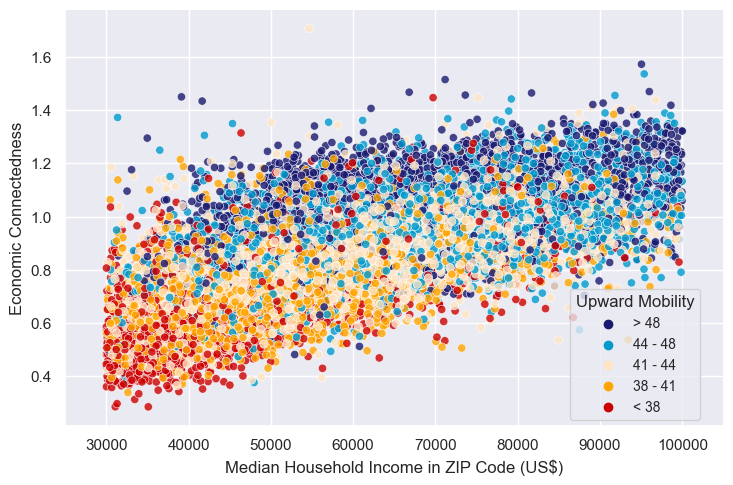

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('dark')
sns.set(rc={'figure.figsize':(10, 6)})
order = ['> 48','44 - 48','41 - 44','38 - 41','< 38']
my_pal = {'> 48':'#191970',
         '44 - 48':'#009acd',
         '41 - 44':'#ffe4c4',
          '38 - 41':'#ffa500',
          '< 38':'#cd0000'
         }



_ = sns.relplot(x='med_inc_2018',
                y ='ec_zip',
                hue = 'bins',
                hue_order=order,
                height=5, aspect=1.5,
                data = dt,
                palette = my_pal,
                alpha=0.8
               )

sns.move_legend(_,loc='lower right',frameon=True, title ="Upward Mobility",bbox_to_anchor=(0.85, 0.13),fontsize=10)
axes = _.axes
axes[0,0].set_xlim(25000,105000)


_.set(xlabel="Median Household Income in ZIP Code (US$)",
     ylabel = "Economic Connectedness")

plt.show()